In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

import xradar as xd
import xarray as xr
import pandas as pd
import pyart



In [13]:
hour = '19'
day = '25'
month = '08'
year = '2022'


glob_str = f'/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/{year}{month}/*'
#glob_str = f'/gpfs/wolf/atm124/proj-shared/gucxprecipradarcmacS2.c1/ppi/{year}{month}/*' #gucxprecipradarcmacS2.c1.{year}{month}{day}.{hour}*'



files = sorted(glob.glob(glob_str))



In [14]:
def identify_updraft():
    with open('/ccsopen/home/braut/kdp_new/output/updraft_area_count2.csv', '+a') as ofile:
        for f in files:
            radar = xd.io.open_cfradial1_datatree(f, first_dim='auto')
            geo_ds = xd.georeference.get_x_y_z(radar['sweep_0'].to_dataset())

            updrafts = np.logical_and(geo_ds.corrected_reflectivity >= 40, geo_ds.corrected_differential_reflectivity >= 2)
            area = np.count_nonzero(updrafts)
            ofile.write('{0}\t{1}\n'.format(f, area))
    return 


## Check out dates with large areas of convective updraft

In [24]:
data = pd.read_table('/ccsopen/home/braut/kdp_new/output/updraft_area_count_202208.csv', sep='\t', names=['file', 'area'])

In [25]:
data.file[data.area>5000]

218     /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
219     /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
226     /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
227     /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
228     /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2405    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2406    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2407    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2583    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2584    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2585    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2586    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
2589    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
3094    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
3556    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
3557    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
5938    /gpfs/wolf2/arm/atm124/world-shared/gucxprecip...
Name: file, dt

# Plot an event

In [26]:
hour = '21'
day = '11'
month = '08'
year = '2022'

#glob_str = f'/gpfs/wolf/atm124/proj-shared/gucxprecipradarS2.00/glue_files/{year}{month}_glued/xprecipradar_guc_volume_{year}{month}{day}-{hour}*'
glob_str = f'/gpfs/wolf/atm124/proj-shared/gucxprecipradarcmacS2.c1/ppi/{year}{month}/gucxprecipradarcmacS2.c1.{year}{month}{day}.{hour}*'

files = sorted(glob.glob(glob_str))
files = data.file

In [27]:
dir_name = "/ccsopen/home/braut/kdp_new/output/plots/plots202208"

if not os.path.exists(dir_name):
    os.makedirs(dir_name)

for fname in files:
    #fname = '/gpfs/wolf/atm124/proj-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220801.220131.nc'
    radar = xd.io.open_cfradial1_datatree(fname, first_dim='auto')
    geo_ds = xd.georeference.get_x_y_z(radar['sweep_0'].to_dataset())

    figure = plt.figure(figsize=(15, 4))
    ax1=plt.subplot(1, 3, 1)
    ax1 = geo_ds.corrected_reflectivity.plot(x='x', y='y', cmap='pyart_Carbone42', vmin=0, vmax=50)
    plt.xlim(-20_000, 20_000)
    plt.ylim(-20_000, 20_000)

    
    ax2 = plt.subplot(1, 3, 2)
    ax2 = geo_ds.ZDR.plot(x='x', y='y', cmap='pyart_LangRainbow12', vmin=0, vmax=6)
    plt.xlim(-20_000, 20_000)
    plt.ylim(-20_000, 20_000)

    ax3 = plt.subplot(1, 3, 3)
    ax3 = geo_ds.corrected_differential_phase.plot(x='x', y='y', cmap='pyart_LangRainbow12', vmin=0, vmax=4)
    plt.xlim(-20_000, 20_000)
    plt.ylim(-20_000, 20_000)

    plt.savefig(f'{dir_name}/plot_'+os.path.basename(fname)+'.jpg')
    plt.close()
    

FileNotFoundError: [Errno 2] No such file or directory: b'/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220801.000124.nc'

(-20000.0, 20000.0)

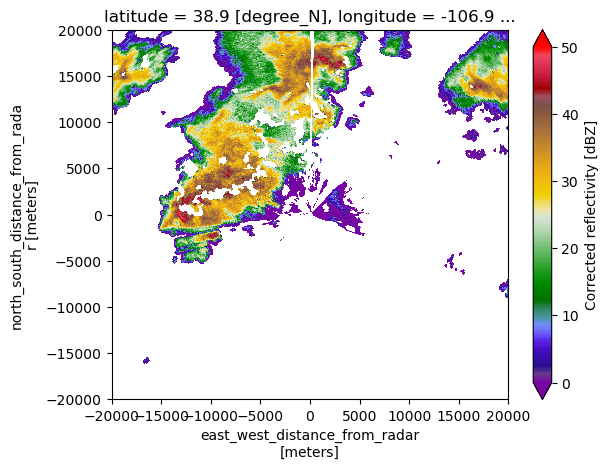

In [105]:
geo_ds = xd.georeference.get_x_y_z(radar['sweep_3'].to_dataset())

geo_ds.corrected_reflectivity.plot(x='x', y='y', cmap='pyart_Carbone42', vmin=0, vmax=50)
plt.xlim(-20_000, 20_000)
plt.ylim(-20_000, 20_000)



(-20000.0, 20000.0)

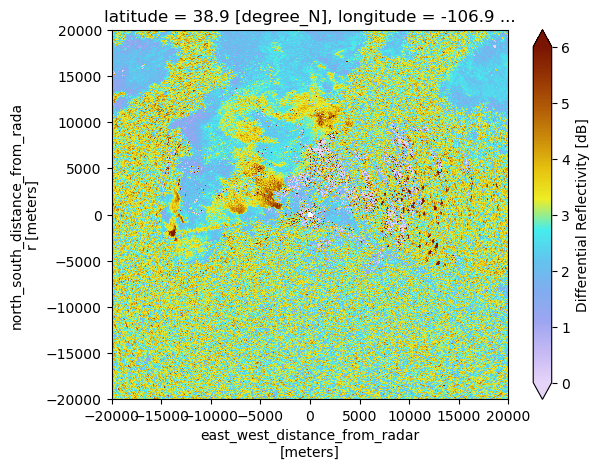

In [103]:
geo_ds.ZDR.plot(x='x', y='y', cmap='pyart_LangRainbow12', vmin=0, vmax=6)
plt.xlim(-20_000, 20_000)
plt.ylim(-20_000, 20_000)

(-20000.0, 20000.0)

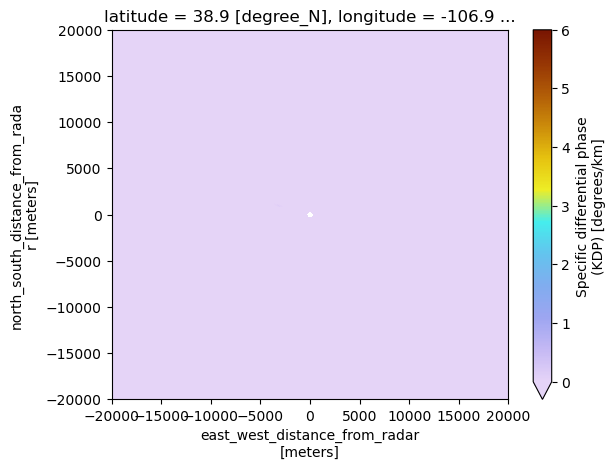

In [106]:
geo_ds.corrected_specific_diff_phase.plot(x='x', y='y', cmap='pyart_LangRainbow12', vmin=0, vmax=6)
plt.xlim(-20_000, 20_000)
plt.ylim(-20_000, 20_000)